In [1]:
import numpy as np
import math
import scipy.integrate as integrate

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
l = 0.02
epsilon = l/2/math.pi

In [4]:
def A_operator(k,n):
    
    #n = 40
    a = 1.5
    b = 1.4
    A = np.zeros((2*n+1, 2*n+1))
    epsilon = l/2/math.pi
    
    for i in range(2*n-1):
        this_n = (i-n+1)/epsilon
        A[i+1,i] = (this_n+k)*(b/2*(this_n - 1/epsilon)+b/2*k)
        A[i+1,i+2] = (this_n+k)*(b/2*(this_n + 1/epsilon)+b/2*k)
        A[i+1,i+1] = (this_n+k)*(a*this_n+a*k)
    
    i=-1
    this_n = (i-n+1)/epsilon
    A[i+1,i+2] = (this_n+k)*(b/2*(this_n + 1/epsilon)+b/2*k)
    A[i+1,i+1] = (this_n+k)*(a*this_n+a*k)
    
    i=2*n-1
    this_n = (i-n+1)/epsilon
    A[i+1,i] = (this_n+k)*(b/2*(this_n - 1/epsilon)+b/2*k)
    A[i+1,i+1] = (this_n+k)*(a*this_n+a*k)
    
    return A

In [5]:
eigen = np.linalg.eig(A_operator(0.2,20))
np.min(eigen[0])
coeff = eigen[1][np.argmin(eigen[0])]
sorted_eigen = np.sort(eigen[0])
sorted_index = np.argsort(eigen[0])
coeff2 = eigen[1][sorted_index[1]]

In [9]:
coeff = eigen[1][np.argmin(eigen[0])]

In [9]:
1/epsilon

314.15926535897927

In [5]:
n= 10
eigen = np.linalg.eig(A_operator(0.2,n))
coeff = eigen[1][:,np.argmin(eigen[0])]
def test_eigenfunc(x,coeff,n):
    
    this_n = np.arange(-n,n+1)
    exp_n = np.exp(1j*this_n*x/epsilon)
    
    return np.dot(exp_n,coeff)
    #f = coeff[n]
    #for i in range(n):
        #f = f + coeff[n-i-1]*np.exp(-1j*(i+1)*x) +  coeff[n+i+1]*np.exp(1j*(i+1)*x)
    #return f
np.min(eigen[0])

0.02155172236970265

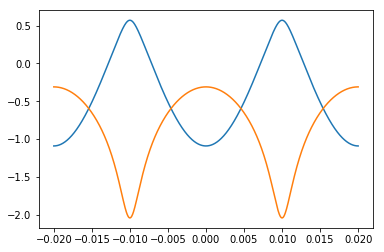

In [17]:
n= 20
eigen = np.linalg.eig(A_operator(200,n))

sorted_index = np.argsort(eigen[0])
sorted_eigen = np.sort(eigen[0])


coeff = eigen[1][:,sorted_index[0]]
coeff2 = eigen[1][:,sorted_index[1]]
number = 1000
xx = np.linspace(-0.02,0.02,num = number)
yy = np.zeros(number,dtype=complex)

xx2 = np.linspace(-0.02,0.02,num = number)
yy2 = np.zeros(number,dtype=complex)
for i in range(number):
    yy[i] = test_eigenfunc(xx[i],coeff,n)
    yy2[i] = test_eigenfunc(xx2[i],coeff2,n)
    
plt.plot(xx,yy.real)
plt.plot(xx,yy2.real)

In [152]:
epsilon*2*3.14

0.019989860852342056

In [132]:
test_eigenfunc(0,coeff,n)

(-1.0708866745323284+0j)

In [134]:
test_eigenfunc(0.04,coeff,n)

(-1.0708866745323284-6.478045717231448e-16j)

In [42]:
n= 10
eigen = np.linalg.eig(A_operator(150,n))
coeff = eigen[1][:,np.argmin(eigen[0])]
eigen[0]

array([14994991.13126726, 10670639.76159024,  7944255.89010213,
        5910690.64572976,  4232657.24908993,  2838663.44805815,
        1722421.76974747,   883691.98053102,    27344.85809238,
          43334.53896152,   322506.10400633,   303752.09778475,
         852425.94547814,  1678647.98626157,  2782377.71742174,
        4163627.44717903,  5823091.48716272,  7774026.13371928,
       10129297.76557909, 13306356.34987092, 18297880.52494869])

In [43]:
0.5/epsilon

157.07963267948963

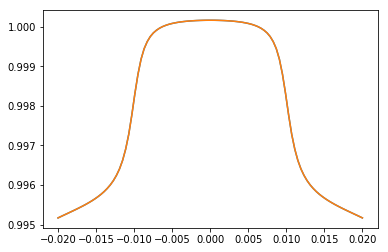

In [137]:
n= 20
k=5
kk = k+4/epsilon
eigen = np.linalg.eig(A_operator(k,n))
eigen2 = np.linalg.eig(A_operator(kk,n))
coeff = eigen[1][:,np.argmin(eigen[0])]
sorted_eigen = np.sort(eigen[0])
sorted_index = np.argsort(eigen[0])
#coeff2 = eigen[1][:,sorted_index[1]]

coeff2 = eigen2[1][:,np.argmin(eigen2[0])]
sorted_eigen2 = np.sort(eigen2[0])
sorted_index2 = np.argsort(eigen2[0])

number = 100
xx = np.linspace(-0.02,0.02,num = number)
yy = np.zeros(number,dtype=complex)

xx2 = np.linspace(-0.02,0.02,num = number)
yy2 = np.zeros(number,dtype=complex)
for i in range(number):
    yy[i] = test_eigenfunc(xx[i],coeff,n)*np.exp(1j*xx[i]*k)
    yy2[i] = test_eigenfunc(xx[i],coeff2,n)*np.exp(1j*xx[i]*kk)
    
plt.plot(xx,yy.real)
plt.plot(xx2,yy2.real)
#plt.plot(xx2,yy2.imag)

In [126]:
coeff

array([-2.29289962e-07,  5.17216965e-07, -9.15160541e-07,  1.49839915e-06,
       -2.38206300e-06,  3.74667704e-06, -5.87996881e-06,  9.24654510e-06,
       -1.46061101e-05,  2.32180836e-05, -3.72042410e-05,  6.02103397e-05,
       -9.86580697e-05,  1.64227582e-04, -2.79092626e-04,  4.87918497e-04,
       -8.88767536e-04,  1.72777476e-03, -3.78368992e-03,  1.11073542e-02,
        9.99862237e-01, -1.07592370e-02,  3.72390745e-03, -1.70952083e-03,
        8.81713328e-04, -4.84816815e-04,  2.77612831e-04, -1.63480666e-04,
        9.82652046e-05, -5.99970946e-05,  3.70855894e-05, -2.31507347e-05,
        1.45672543e-05, -9.22382883e-06,  5.86654923e-06, -3.73869281e-06,
        2.37730206e-06, -1.49557936e-06,  9.13533353e-07, -5.16345389e-07,
        2.28922755e-07])

In [85]:
eigen[0]

array([9.16459598e+07, 7.04116202e+07, 5.57068627e+07, 4.45605153e+07,
       3.57777751e+07, 2.87161315e+07, 2.29756629e+07, 1.82840874e+07,
       1.44443717e+07, 1.13074576e+07, 8.75657751e+06, 6.69723799e+06,
       5.04951944e+06, 3.74051902e+06, 2.69907226e+06, 1.86244949e+06,
       1.19191712e+06, 6.73125181e+05, 3.03068267e+05, 8.25390998e+04,
       9.16459598e+07, 7.04116202e+07, 5.57068627e+07, 4.45605153e+07,
       3.57777751e+07, 2.87161315e+07, 2.29756629e+07, 1.82840874e+07,
       1.44443717e+07, 1.13074576e+07, 8.75657751e+06, 6.69723799e+06,
       5.04951944e+06, 3.74051902e+06, 2.69907226e+06, 1.86244949e+06,
       1.19191712e+06, 6.73125181e+05, 3.03068267e+05, 8.25390998e+04,
       0.00000000e+00])

In [45]:
yy.real

array([-1.0000896 , -1.00008521, -1.00007229, -1.00005158, -1.00002439,
       -0.99999264, -0.99995897, -0.99992673, -0.99989986, -0.99988227,
       -0.99987695, -0.99988488, -0.99990461, -0.99993288, -0.9999657 ,
       -0.99999924, -1.00003026, -1.00005629, -1.00007553, -1.00008679,
       -1.00008943, -1.0000833 , -1.00006874, -1.00004661, -1.00001833,
       -0.99998596, -0.99995228, -0.9999208 , -0.99989548, -0.99988016,
       -0.99987749, -0.99988796, -0.9999097 , -0.99993921, -0.99997247,
       -1.00000573, -1.00003594, -1.00006073, -1.00007845, -1.00008802,
       -1.0000889 , -1.00008104, -1.00006488, -1.00004139, -1.0000121 ,
       -0.99997923, -0.99994569, -0.99991511, -0.99989151, -0.99987856,
       -0.99987856, -0.99989151, -0.99991511, -0.99994569, -0.99997923,
       -1.0000121 , -1.00004139, -1.00006488, -1.00008104, -1.0000889 ,
       -1.00008802, -1.00007845, -1.00006073, -1.00003594, -1.00000573,
       -0.99997247, -0.99993921, -0.9999097 , -0.99988796, -0.99

/Users/xiao/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


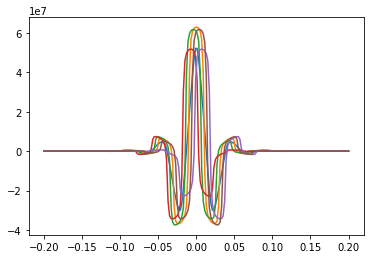

In [179]:
x = np.linspace(-0.2,0.2,num=200)
y = np.linspace(-0.2,0.2,num=200)
for i in range(200):
    y[i] = myfunc_cal_test(x[i])
plt.plot(x,y)
x = np.linspace(-0.2,0.2,num=200)
y = np.linspace(-0.2,0.2,num=200)
for k in range(5):
    this_x = k/5*l
    for i in range(200):
        y[i] = myfunc_cal(x[i],this_x)
    plt.plot(x,y)

In [168]:
def myfunctoint_cal(k,x,this_x):
    n= 20
    #this_x = l/8
    eigen = np.linalg.eig(A_operator(k,n))
    coeff = eigen[1][:,np.argmin(eigen[0])]
    lamda_cal = np.min(eigen[0])
    fi_x = test_eigenfunc(this_x,coeff,n)
    fi_xp = test_eigenfunc(this_x+x,coeff,n)
    fifi = fi_x*np.conj(fi_xp)
    return (np.exp(-1j*x*k)*fifi).real*lamda_cal/l
    #return math.cos(x*k)*lamda_cal/l

In [175]:
def myfunctoint_cal_test(k,x):
    n= 20
    #this_x = l/8
    eigen = np.linalg.eig(A_operator(k,n))
    coeff = eigen[1][:,np.argmin(eigen[0])]
    lamda_cal = np.min(eigen[0])
    fi_x = test_eigenfunc(-x,coeff**2,n)
    return (np.exp(-1j*x*k)*fi_x).real*lamda_cal/l

In [223]:
def myfunctoint_cal_12(k,x,this_x):
    n= 20
    #this_x = l/8
    eigen = np.linalg.eig(A_operator(k,n))

    sorted_index = np.argsort(eigen[0])
    sorted_eigen = np.sort(eigen[0])


    coeff1 = eigen[1][:,sorted_index[0]]
    coeff2 = eigen[1][:,sorted_index[1]]
    
    #eigen = np.linalg.eig(A_operator(k,n))
    #coeff = eigen[1][:,np.argmin(eigen[0])]
    
    lamda_cal_1 = sorted_eigen[0]
    lamda_cal_2 = sorted_eigen[1]
    fi_x_1 = test_eigenfunc(this_x,coeff1,n)
    fi_xp_1 = test_eigenfunc(this_x+x,coeff1,n)
    fifi_1 = fi_x_1*np.conj(fi_xp_1)
    
    fi_x_2 = test_eigenfunc(this_x,coeff2,n)
    fi_xp_2 = test_eigenfunc(this_x+x,coeff2,n)
    fifi_2 = fi_x_2*np.conj(fi_xp_2)
    
    
    return (np.exp(-1j*x*k)*fifi_1).real*lamda_cal_1/l + (np.exp(-1j*x*k)*fifi_2).real*lamda_cal_2/l
    #return math.cos(x*k)*lamda_cal/l

In [40]:
def myfunctoint_cal_123(k,x,this_x):
    n= 20
    #this_x = l/8
    eigen = np.linalg.eig(A_operator(k,n))

    sorted_index = np.argsort(eigen[0])
    sorted_eigen = np.sort(eigen[0])


    coeff1 = eigen[1][:,sorted_index[0]]
    coeff2 = eigen[1][:,sorted_index[1]]
    coeff3 = eigen[1][:,sorted_index[2]]
    
    #eigen = np.linalg.eig(A_operator(k,n))
    #coeff = eigen[1][:,np.argmin(eigen[0])]
    
    lamda_cal_1 = sorted_eigen[0]
    lamda_cal_2 = sorted_eigen[1]
    lamda_cal_3 = sorted_eigen[2]
    
    fi_x_1 = test_eigenfunc(this_x,coeff1,n)
    fi_xp_1 = test_eigenfunc(this_x+x,coeff1,n)
    fifi_1 = fi_x_1*np.conj(fi_xp_1)
    
    fi_x_2 = test_eigenfunc(this_x,coeff2,n)
    fi_xp_2 = test_eigenfunc(this_x+x,coeff2,n)
    fifi_2 = fi_x_2*np.conj(fi_xp_2)
    
    fi_x_3 = test_eigenfunc(this_x,coeff3,n)
    fi_xp_3 = test_eigenfunc(this_x+x,coeff3,n)
    fifi_3 = fi_x_3*np.conj(fi_xp_3)
    
    
    return (np.exp(1j*x*k)*fifi_1).real*lamda_cal_1/l + (np.exp(1j*x*k)*fifi_2).real*lamda_cal_2/l + (np.exp(1j*x*k)*fifi_3).real*lamda_cal_3/l 
    #return math.cos(x*k)*lamda_cal/l

In [49]:
def myfunctoint_cal_1234(k,x,this_x):
    n= 20
    #this_x = l/8
    eigen = np.linalg.eig(A_operator(k,n))

    sorted_index = np.argsort(eigen[0])
    sorted_eigen = np.sort(eigen[0])


    coeff1 = eigen[1][:,sorted_index[0]]
    coeff2 = eigen[1][:,sorted_index[1]]
    coeff3 = eigen[1][:,sorted_index[2]]
    coeff4 = eigen[1][:,sorted_index[3]]
    
    #eigen = np.linalg.eig(A_operator(k,n))
    #coeff = eigen[1][:,np.argmin(eigen[0])]
    
    lamda_cal_1 = sorted_eigen[0]
    lamda_cal_2 = sorted_eigen[1]
    lamda_cal_3 = sorted_eigen[2]
    lamda_cal_4 = sorted_eigen[3]
    
    fi_x_1 = test_eigenfunc(this_x,coeff1,n)
    fi_xp_1 = test_eigenfunc(this_x+x,coeff1,n)
    fifi_1 = fi_x_1*np.conj(fi_xp_1)
    
    fi_x_2 = test_eigenfunc(this_x,coeff2,n)
    fi_xp_2 = test_eigenfunc(this_x+x,coeff2,n)
    fifi_2 = fi_x_2*np.conj(fi_xp_2)
    
    fi_x_3 = test_eigenfunc(this_x,coeff3,n)
    fi_xp_3 = test_eigenfunc(this_x+x,coeff3,n)
    fifi_3 = fi_x_3*np.conj(fi_xp_3)
    
    fi_x_4 = test_eigenfunc(this_x,coeff4,n)
    fi_xp_4 = test_eigenfunc(this_x+x,coeff4,n)
    fifi_4 = fi_x_4*np.conj(fi_xp_4)
    
    
    return (np.exp(1j*x*k)*fifi_1).real*lamda_cal_1/l + (np.exp(1j*x*k)*fifi_2).real*lamda_cal_2/l + (np.exp(1j*x*k)*fifi_3).real*lamda_cal_3/l + (np.exp(1j*x*k)*fifi_4).real*lamda_cal_4/l 
    #return math.cos(x*k)*lamda_cal/l

In [219]:
def myfunctoint_cal_m(k,x,this_x,m):
    n= 20
    #this_x = l/8
    eigen = np.linalg.eig(A_operator(k,n))

    sorted_index = np.argsort(eigen[0])
    sorted_eigen = np.sort(eigen[0])
    
    temp = 0
    
    for i in range(m):
        coeff = eigen[1][:,sorted_index[i]]
        lamda_cal = sorted_eigen[i]
        fi_x = test_eigenfunc(this_x,coeff,n)
        fi_xp = test_eigenfunc(this_x+x,coeff,n)
        fifi = fi_x*np.conj(fi_xp)
        
        temp += (np.exp(-1j*x*k)*fifi).real*lamda_cal/l
    
    return temp


   

In [20]:
def myfunc_cal_test(x):
    return integrate.quad(myfunctoint_cal_test,-1/2/epsilon,1/2/epsilon,args=(x,))[0]

In [31]:
def myfunc_cal_12(x,this_x):
    return integrate.quad(myfunctoint_cal_12,-1/2/epsilon,1/2/epsilon,args=(x,this_x))[0]

In [41]:
def myfunc_cal_123(x,this_x):
    return integrate.quad(myfunctoint_cal_123,-1/2/epsilon,1/2/epsilon,args=(x,this_x))[0]

In [51]:
def myfunc_cal_1234(x,this_x):
    return integrate.quad(myfunctoint_cal_1234,-1/2/epsilon,1/2/epsilon,args=(x,this_x))[0]

In [64]:
def myfunc_cal_m(x,this_x,m):
    return integrate.quad(myfunctoint_cal_m,-1/2/epsilon,1/2/epsilon,args=(x,this_x,m))[0]

In [92]:
def bloch_coeff_1(k,u,dx):
    numberofpoints = u.shape[0]
    x = np.linspace(0,numberofpoints*dx-dx,num=numberofpoints)
    fi_x = np.zeros(numberofpoints,dtype=complex)
    
    n= 20
    #this_x = l/8
    eigen = np.linalg.eig(A_operator(k,n))
    coeff = eigen[1][:,np.argmin(eigen[0])]
    
    for i in range(numberofpoints):
        fi_x[i] = test_eigenfunc(x[i],coeff,n)
    
    exp_kx = np.exp(-1j*k*x)
    
    return np.sum(u*exp_kx*np.conj(fi_x))*dx

In [255]:
def bloch_coeff_2(k,u,dx):
    numberofpoints = u.shape[0]
    x = np.linspace(0,numberofpoints*dx-dx,num=numberofpoints)
    fi_x = np.zeros(numberofpoints,dtype=complex)
    
    n= 20
    #this_x = l/8
    eigen = np.linalg.eig(A_operator(k,n))
    
    sorted_index = np.argsort(eigen[0])
    #sorted_eigen = np.sort(eigen[0])
    
    coeff = eigen[1][:,sorted_index[1]]
    
    if coeff[20]>0:
    
        for i in range(numberofpoints):
            fi_x[i] = test_eigenfunc(x[i],coeff,n)
    else:
        for i in range(numberofpoints):
            fi_x[i] = test_eigenfunc(x[i],-coeff,n)
    
    exp_kx = np.exp(-1j*k*x)
    
    return np.sum(u*exp_kx*np.conj(fi_x))*dx

In [249]:
def inverse_bloch_1_toint(k,x,u,dx):
    eigen = np.linalg.eig(A_operator(k,20))
    coeff = eigen[1][:,np.argmin(eigen[0])]
    fi_x = test_eigenfunc(x,coeff,n)
    return (bloch_coeff_1(k,u,dx)*np.exp(1j*k*x)*fi_x).real

In [256]:
def inverse_bloch_2_toint(k,x,u,dx):
    eigen = np.linalg.eig(A_operator(k,20))
    sorted_index = np.argsort(eigen[0])
    coeff = eigen[1][:,sorted_index[1]]
    if coeff[20]>0:
        fi_x = test_eigenfunc(x,coeff,n)
    else:
        fi_x = test_eigenfunc(x,-coeff,n)
    return (bloch_coeff_2(k,u,dx)*np.exp(1j*k*x)*fi_x).real

In [251]:
def inverse_bloch_1tt_toint(k,x,u,dx):
    eigen = np.linalg.eig(A_operator(k,20))
    coeff = eigen[1][:,np.argmin(eigen[0])]
    lamda_cal = np.min(eigen[0])
    fi_x = test_eigenfunc(x,coeff,n)
    return lamda_cal*(bloch_coeff_1(k,u,dx)*np.exp(1j*k*x)*fi_x).real

In [98]:
def bloch_projection_1(x,u,dx):
    return integrate.quad(inverse_bloch_1_toint,-1/2/epsilon,1/2/epsilon,args=(x,u,dx))[0]

In [211]:
def bloch_projection_2(x,u,dx):
    return integrate.quad(inverse_bloch_2_toint,-1/2/epsilon,1/2/epsilon,args=(x,u,dx),limit=200)[0]

In [143]:
def bloch_projection_1tt(x,u,dx):
    return integrate.quad(inverse_bloch_1tt_toint,-1/2/epsilon,1/2/epsilon,args=(x,u,dx))[0]

In [206]:
uu = np.loadtxt('./Documents/CFR/u_eigen_test.csv',delimiter=',')

In [248]:
n

20

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

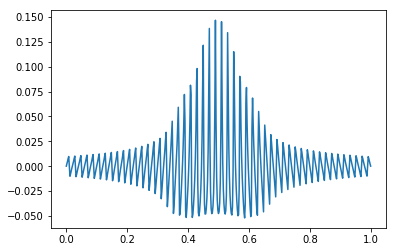

In [257]:
x = np.linspace(0,1,num=501)
y_2 = np.linspace(-0.2,0.2,num=501)
for i in range(501):
    print(i)
    y_2[i] = bloch_projection_2(x[i],y_tt3/2/np.pi,0.002) 
plt.plot(x,y_2)

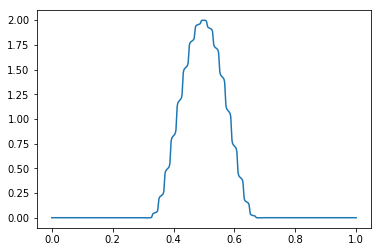

In [244]:
plt.plot(x,y_tt3/2/np.pi)

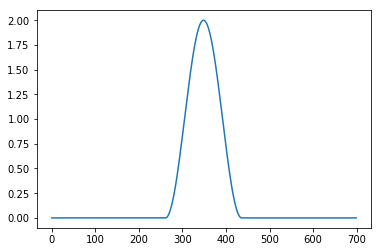

In [227]:
plt.plot(uu)

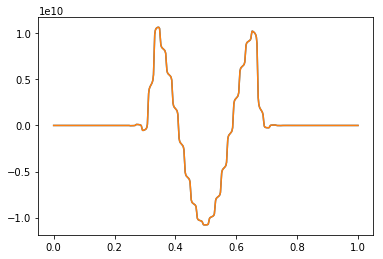

In [201]:
plt.plot(x,-y_tt3*10e9/8000/2/np.pi/0.02)
plt.plot(x,uutt[100:601])

In [129]:
y

array([-1.95583009e-08, -2.45248505e-08, -2.89752526e-08, -3.27503362e-08,
       -3.76120820e-08, -5.70877081e-08, -7.15042575e-09,  4.33915167e-09,
        1.02357334e-08,  1.55827761e-08,  2.09268857e-08,  2.60740906e-08,
        3.06766295e-08,  3.45566145e-08,  3.94868926e-08,  5.91884068e-08,
        6.82420050e-09, -5.21252289e-09, -1.13668140e-08, -1.69304245e-08,
       -2.24822381e-08, -2.78224336e-08, -3.25858307e-08, -3.65724647e-08,
       -4.15583926e-08, -6.14252388e-08, -6.37447188e-09,  6.26464166e-09,
        1.26993013e-08,  1.84961823e-08,  2.42703340e-08,  2.98156311e-08,
        3.47472070e-08,  3.88381211e-08,  4.38545301e-08,  6.37786886e-08,
        5.72449810e-09, -7.57945321e-09, -1.43172633e-08, -2.03627615e-08,
       -2.63715915e-08, -3.21303786e-08, -3.72307794e-08, -4.14100247e-08,
       -4.63961474e-08, -6.61405575e-08, -4.65741593e-09,  9.37771581e-09,
        1.64329383e-08,  2.27312579e-08,  2.89736511e-08,  3.49365069e-08,
        4.01794497e-08,  

In [196]:
uutt = np.loadtxt('./Documents/CFR/utt_eigen_test.csv',delimiter=',')

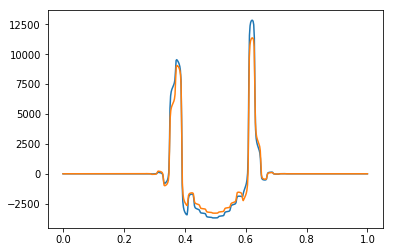

In [153]:
plt.plot(xtt,ytt/10e9*8000)
plt.plot(x,-y_tt)

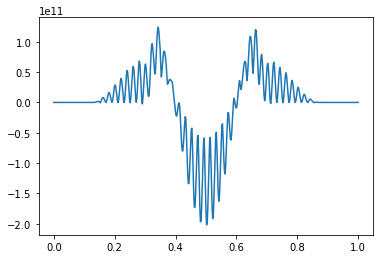

In [158]:
plt.plot(xtt,uutt[100:599]*2*np.pi)

In [122]:
x[501]

IndexError: index 501 is out of bounds for axis 0 with size 501

0


/Users/xiao/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


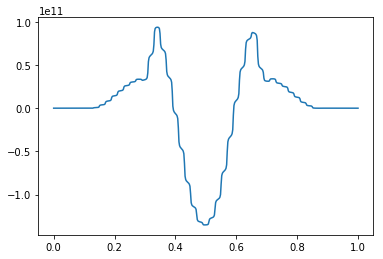

In [160]:
xtt = np.linspace(0,1,num=499)
ytt2 = np.linspace(-0.2,0.2,num=499)
for i in range(499):
    print(i)
    ytt2[i] = bloch_projection_1(xtt[i],uutt[100:599],0.002)
plt.plot(xtt,ytt2)

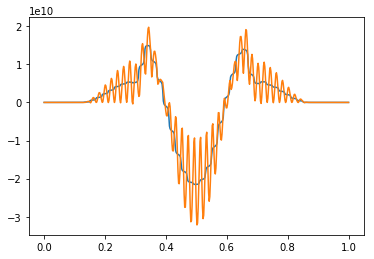

In [164]:
plt.plot(xtt,ytt2/2/np.pi)
plt.plot(xtt,uutt[100:599])

In [21]:
coeff = eigen[1][:,np.argmin(eigen[0])]
np.sum(coeff**2)

0.9999999999999997

In [21]:
test_eigenfunc(0,coeff,20)

(-1.0708866745323284+0j)

In [22]:
def myfunc_cal(x,this_x):
    return integrate.quad(myfunctoint_cal,-1/2/epsilon,1/2/epsilon,args=(x,this_x))[0]

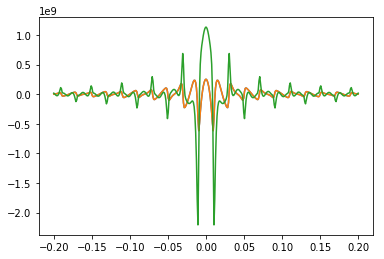

In [42]:
x = np.linspace(-0.2,0.2,num=400)
y = np.linspace(-0.2,0.2,num=400)
for i in range(400):
    y[i] = myfunc_cal_12(x[i],0)
plt.plot(x,y)
x = np.linspace(-0.2,0.2,num=400)
y = np.linspace(-0.2,0.2,num=400)
for i in range(400):
    y[i] = myfunc_cal_12(x[i],0)
plt.plot(x,y)
x = np.linspace(-0.2,0.2,num=400)
y = np.linspace(-0.2,0.2,num=400)
for i in range(400):
    y[i] = myfunc_cal_123(x[i],0)
plt.plot(x,y)

/Users/xiao/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


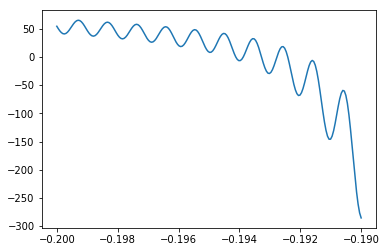

In [270]:
x2 = np.linspace(-0.2,-0.19,num=200)
y2 = np.linspace(-0.2,0.2,num=200)
for i in range(200):
    y2[i] = myfunc_cal(x2[i],0)
plt.plot(x2,y2)

/Users/xiao/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


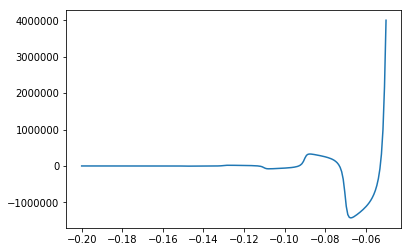

In [268]:
x2 = np.linspace(-0.2,-0.05,num=200)
y2 = np.linspace(-0.2,0.2,num=200)
for i in range(200):
    y2[i] = myfunc_cal(x2[i],0)
plt.plot(x2,y2)

/Users/xiao/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


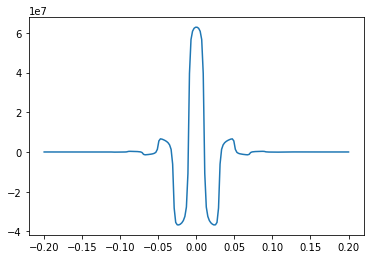

In [265]:
x2 = np.linspace(-0.2,0.2,num=200)
y2 = np.linspace(-0.2,0.2,num=200)
for i in range(200):
    y2[i] = myfunc_cal(x2[i],0)
plt.plot(x2,y2)

In [70]:
horizon = 10
kernel = np.zeros(horizon)
dx = l
for i in range(horizon):
    kernel[i] = integrate.quad(myfunc_cal_m,dx/2+dx*i,dx*3/2+dx*i,args=(0,20))[0]
kernel

array([-22800335.64471615,   3595941.95429391,  -2422044.60300903,
          910622.61884932,   -869459.05770758,    405624.2737897 ,
         -443260.80099653,    228339.31393388,   -268061.14229596,
          146188.95909866])

In [260]:
horizon = 200

dx = l/20
kernel_plus = np.zeros((20,horizon))
kernel_minus = np.zeros((20,horizon))

for k in range(20):
    print(k)
    this_x = k/20*l
    for i in range(horizon):
        kernel_plus[k,i] = integrate.quad(myfunc_cal,dx/2+dx*i,dx*3/2+dx*i,args=this_x)[0]
        kernel_minus[k,i] = integrate.quad(myfunc_cal,-dx/2-dx*i,-dx*3/2-dx*i,args=this_x)[0]

0


/Users/xiao/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [261]:
np.savetxt('./Documents/CFR/twoD_kernel_plus_200.csv',kernel_plus, delimiter=',')
np.savetxt('./Documents/CFR/twoD_kernel_minus_200.csv',kernel_minus, delimiter=',')

In [258]:
horizon = 400

dx = l/10
kernel_plus_2 = np.zeros((10,horizon))
kernel_minus_2 = np.zeros((10,horizon))

for k in range(10):
    print(k)
    this_x = k/10*l
    for i in range(horizon):
        kernel_plus_2[k,i] = integrate.quad(myfunc_cal_12,dx/2+dx*i,dx*3/2+dx*i,args=this_x)[0]
        kernel_minus_2[k,i] = integrate.quad(myfunc_cal_12,-dx/2-dx*i,-dx*3/2-dx*i,args=this_x)[0]

0
1
2
3


/Users/xiao/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


4
5
6
7
8
9


In [94]:
kernel.shape

(100,)

In [78]:
horizon = 100
kernel = np.zeros(horizon)
dx = l/5
for i in range(horizon):
    kernel[i] = integrate.quad(myfunc_cal,dx/2+dx*i,dx*3/2+dx*i,args=0.01)[0]
kernel

/Users/xiao/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


array([ 1.87188680e+05,  1.25511671e+05,  4.06765256e+04, -4.58179944e+04,
       -1.13044340e+05, -1.46377726e+05, -1.41193419e+05, -1.03505632e+05,
       -4.74905585e+04,  9.20938848e+03,  5.08631937e+04,  6.80412663e+04,
        5.97466747e+04,  3.27961384e+04, -1.14654260e+03, -2.97669289e+04,
       -4.40949374e+04, -4.10353726e+04, -2.37393155e+04,  1.19876611e+02,
        2.14157886e+04,  3.28428513e+04,  3.12725885e+04,  1.84651516e+04,
        2.40638136e+01, -1.69064920e+04, -2.63039439e+04, -2.53296984e+04,
       -1.51082355e+04, -3.67669641e+01,  1.40294802e+04,  2.19945894e+04,
        2.13218512e+04,  1.27952849e+04,  3.09764126e+01, -1.20117423e+04,
       -1.89226587e+04, -1.84268697e+04, -1.11040743e+04, -2.44218110e+01,
        1.05102917e+04,  1.66145042e+04,  1.62327958e+04,  9.81203072e+03,
        1.93631355e+01, -9.34650297e+03, -1.48135650e+04, -1.45101864e+04,
       -8.79173016e+03, -1.56457466e+01,  8.41680120e+03,  1.33677550e+04,
        1.31206537e+04,  

In [82]:
dx = l/5
i = -1
integrate.quad(myfunc_cal,dx/2+dx*i,dx*3/2+dx*i,args=0)[0]

242333.09758381956

In [72]:
horizon = 10
kernel = np.zeros(horizon)
dx = l
for i in range(horizon):
    kernel[i] = integrate.quad(myfunc_cal,dx/2+dx*i,dx*3/2+dx*i,args=0)[0]
kernel

/Users/xiao/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


array([-405756.95390134,  -22882.34163382,   17534.40404965,
        -10396.17161945,    6551.36806854,   -4450.63122424,
          3213.7114337 ,   -2430.56998166,    1904.12166854,
         -1533.00608139])

In [134]:
-kernel

array([-18.76998565, -13.13564862,  -5.39882919,   2.49957059,
         8.72978999,  12.0857835 ,  12.26691764,   9.85480116,
         6.02089304,   2.08946405,  -0.88260076,  -2.3721271 ,
        -2.43612081,  -1.55877902,  -0.38708424,   0.5312679 ,
         0.91433571,   0.77587472,   0.33706856,  -0.11982555])

In [147]:
epsilon

0.003183098861837907

In [83]:
test_eigenfunc(0,coeff)

(-0.11231780185503593+0j)

In [19]:
astar = 0.5385
alpha = -0.5853*epsilon**2

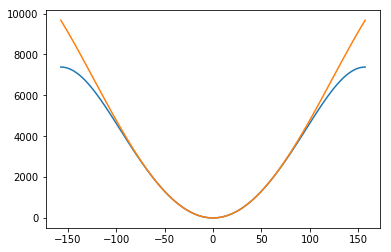

In [20]:
number = 100
scale_test = 1
k = np.linspace(-0.5/epsilon*scale_test,0.5/epsilon*scale_test,num = number)
lamda_cal = np.linspace(-0.5/epsilon,0.5/epsilon,num = number)
lamda_paper = np.linspace(-0.5/epsilon,0.5/epsilon,num = number)

for i in range(number):
    eigen = np.linalg.eig(A_operator(k[i],10))[0]
    lamda_cal[i] = np.sort(eigen)[0]
    lamda_paper[i] = (astar*k[i]**2+alpha*k[i]**4)
    
plt.plot(k,lamda_cal)
plt.plot(k,lamda_paper)

In [103]:
def fourier_toint(k,n):
    eigen = np.linalg.eig(A_operator(k,10))[0]
    lamda_cal = np.sort(eigen)[0]
    return np.cos(l*k*n)*lamda_cal

In [165]:
horizon = 10
kernel = np.zeros(10)
for i in range(10):
    kernel[i] = integrate.quad(fourier_toint,-0.5/epsilon,0.5/epsilon,args=i)[0]
kernel

array([ 1.05896451e+06, -5.72956085e+05,  4.94230264e+04, -6.94881672e+03,
        1.18789352e+03, -2.26802887e+02,  4.71940905e+01, -1.09685832e+01,
        3.14885484e+00, -1.29489399e+00])

In [28]:
horizon = 10
kernel = np.zeros(10)
for i in range(10):
    kernel[i] = integrate.quad(myfunctoint_cal_test,-0.5/epsilon,0.5/epsilon,args=((i+1)*l,))[0]
kernel*0.02

/Users/xiao/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


array([-5.72528387e+05,  4.93376170e+04, -6.92537729e+03,  1.17952950e+03,
       -2.22932806e+02,  4.49670405e+01, -9.48337308e+00,  2.06610587e+00,
       -4.61579676e-01,  1.05320380e-01])

In [65]:
eigen = np.linalg.eig(A_operator(5,10))
lamda_cal = np.min(eigen[0])
coeff = eigen[1][:,np.argmin(eigen[0])]
coeff

array([ 1.96665634e-05, -4.68334033e-05,  8.83338286e-05, -1.56144188e-04,
        2.72651308e-04, -4.82673409e-04,  8.84381862e-04, -1.72398808e-03,
        3.78029254e-03, -1.11041589e-02, -9.99862369e-01,  1.07561418e-02,
       -3.72056374e-03,  1.70577416e-03, -8.77362466e-04,  4.79605073e-04,
       -2.71205667e-04,  1.55434038e-04, -8.79820770e-05,  4.66675359e-05,
       -1.96038435e-05])

In [73]:
eigen = np.linalg.eig(A_operator(5+1/epsilon*10,10))
lamda_cal = np.min(eigen[0])
coeff = eigen[1][:,np.argmin(eigen[0])]
coeff

array([ 9.99933128e-01, -1.07614387e-02,  3.72481100e-03, -1.70996679e-03,
        8.81952847e-04, -4.84951988e-04,  2.77691652e-04, -1.63527710e-04,
        9.82937756e-05, -6.00146827e-05,  3.70965338e-05, -2.31576046e-05,
        1.45715972e-05, -9.22658963e-06,  5.86831110e-06, -3.73981888e-06,
        2.37801983e-06, -1.49603183e-06,  9.13810168e-07, -5.16502028e-07,
        2.28992247e-07])

In [32]:
np.sum(coeff**2)

0.9999999999999999

In [21]:
def lambda_over_alpha(k,n):
    
    index_k = int(np.floor(k*epsilon+0.5))
    this_k = k-index_k/epsilon
    eigen = np.linalg.eig(A_operator(this_k,n))
    lamda_cal = np.min(eigen[0])
    coeff = eigen[1][:,np.argmin(eigen[0])]
    
    
    if abs(index_k)>n:
        return 0
    else:
        this_alphan = coeff[index_k+n]

        return lamda_cal/this_alphan**2
    
    
    

In [ ]:
def lambda_times_alpha(k,n):
    
    index_k = int(np.floor(k*epsilon+0.5))
    this_k = k-index_k/epsilon
    eigen = np.linalg.eig(A_operator(this_k,n))
    lamda_cal = np.min(eigen[0])
    coeff = eigen[1][:,np.argmin(eigen[0])]
    
    
    if abs(index_k)>n:
        return 0
    else:
        this_alphan = coeff[index_k+n]

        return lamda_cal*this_alphan**2
    
    
    

In [22]:
def lambda_over_alpha_toff(k,x,n):
    return lambda_over_alpha(k,n)*np.exp(1j*k*x)

In [23]:
def lambda_over_alpha_ff(x,n):
    return integrate.quad(lambda_over_alpha_toff,(-n-0.5)/epsilon,(n+0.5)/epsilon,args=(x,n))[0]

In [104]:
horizon = 10
kernel = np.zeros(10)
for i in range(10):
    kernel[i] = integrate.quad(fourier_toint,-0.5/epsilon,0.5/epsilon,args=i)[0]
kernel

array([ 1.05896451e+06, -5.72956085e+05,  4.94230264e+04, -6.94881672e+03,
        1.18789352e+03, -2.26802887e+02,  4.71940905e+01, -1.09685832e+01,
        3.14885484e+00, -1.29489399e+00])

In [99]:
kernel/l

array([-46455422.58398477,  13773541.27639271,  -6937200.08432795,
         4174195.70259144,  -2763122.09339232,   1951998.65404403,
        -1447387.13962282,   1114077.55070622,   -883193.42131715,
          716978.03269075])

In [60]:
l/2/3.14

0.003184713375796178

In [62]:
1/epsilon

314.15926535897927